| Technological Institute of the Philippines | Quezon City - Computer Engineering |
| --- | --- |
| **Course Code:** | CPE 313 |
| **Code Title:** | Advanced Machine Learning and Deep Learning |
| **2nd Semester** | AY 2023-2024 |
| --- | --- |
| **ACTIVITY NO.6** | **Performing Face Recognition** |
| **Name** | Mendoza, Paulo |
| --- | --- |
| **Section** | CPE32S8 |
| **Date Performed**: | February 20, 2023 |
| **Date Submitted**: | February 20, 2023 |
| **Instructor**: | Engr. Roman M. Richard |

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [2]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [9]:
#!pip install opencv-contrib-python --user

  Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.9.0.80-cp37-abi3-win_amd64.whl (45.3 MB)


In [12]:
#!pip install opencv-contrib-python --upgrade

In [16]:
#!pip install opencv-contrib-python

In [ ]:
#!pip uninstall opencv opencv-contrib-python

In [1]:
import cv2
from time import sleep
import os
# this is to capture an image for data in training the model
key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
sleep(2)
while True:

    try:
        check, frame = webcam.read()
        print(check)  # prints true as long as the webcam is running
        print(frame)  # prints matrix values of each frame
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):

            cv2.imwrite(os.path.join('/Capturing_Images_From_WebCam/Data/Output',
                                     'saved_img.jpg'), frame)
            webcam.release()
            print("Processing image...")
            img_ = cv2.imread('saved_img.jpg', cv2.IMREAD_ANYCOLOR)
            print("Converting RGB image to grayscale...")
            gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
            print("Converted RGB image to grayscale...")
            print("Resizing image to 28x28 scale...")
            img_ = cv2.resize(gray, (30, 30))
            print("Resized...")
            img_resized = cv2.imwrite(os.path.join('/Capturing_Images_From_WebCam/Data/Output',
                                                   'saved_img-final.jpg'), img_)
            print("Image saved!")

            break

        elif key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break

    except KeyboardInterrupt:
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

True
[[[252 247 228]
  [249 244 225]
  [245 239 220]
  ...
  [222 225 176]
  [220 224 175]
  [218 223 174]]

 [[255 255 244]
  [255 255 244]
  [255 255 243]
  ...
  [220 223 175]
  [219 223 175]
  [218 223 175]]

 [[255 254 246]
  [255 255 248]
  [255 255 248]
  ...
  [221 223 177]
  [220 223 177]
  [220 225 178]]

 ...

 [[ 98 104  14]
  [128 139  40]
  [168 187  74]
  ...
  [184 187 148]
  [182 186 147]
  [182 187 148]]

 [[101 108  27]
  [132 143  53]
  [166 188  80]
  ...
  [176 186 140]
  [176 187 141]
  [179 190 144]]

 [[103 110  35]
  [132 145  59]
  [166 188  84]
  ...
  [170 183 134]
  [172 185 136]
  [177 190 141]]]
True
[[[244 240 224]
  [240 237 220]
  [236 232 214]
  ...
  [222 221 180]
  [223 221 180]
  [224 221 180]]

 [[255 255 244]
  [255 255 244]
  [255 255 243]
  ...
  [223 223 180]
  [223 221 179]
  [223 221 179]]

 [[255 255 247]
  [255 255 246]
  [255 255 245]
  ...
  [224 223 180]
  [224 223 180]
  [223 222 179]]

 ...

 [[ 83 103  18]
  [136 155  71]
  [163 182

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [1]:
import numpy as np
import os
import sys
import cv2

def read_images(path, sz=None):
    c = 0
    X, y = [], []
  
    for dirname, dirnames, filenames in os.walk(path):
        for subdirname in dirnames:
            subject_path = os.path.join(dirname, subdirname)
            for filename in os.listdir(subject_path):
                try:
                    if filename == ".directory":
                        continue
                    filepath = os.path.join(subject_path, filename)
                    im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

                    # Resize the images to the prescribed size
                    if sz is not None:
                        im = cv2.resize(im, (200, 200))

                    X.append(np.asarray(im, dtype=np.uint8))
                    y.append(c)

                except IOError as e:
                    print(f"I/O Error({e.errno}): {e.strerror}")
                except:
                    print("Unexpected error:", sys.exc_info()[0])
                    raise
            c = c+1
    return [X, y]

def face_rec():
    names = ['Labbao', 'McCarthy', 'Mendoza', 'Mogate', 'Navida']  # Put your names here for faces to recognize
    if len(sys.argv) < 2:
        print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
        sys.exit()

    [X, y] = read_images(r"D:\data sci\resources\images", (200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.EigenFaceRecognizer_create()

    model.train(X, y)

    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r"D:\data sci\resources/haarcascade_frontalface_default.xml")

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            #roi = region of interest
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                print(params)
                label = names[params[0]]
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()


(4, 7404.814795021604)
(4, 7194.151064014556)
(4, 7053.605068608016)
(4, 7311.649199584951)
(4, 7194.091167528625)
(4, 6981.958292558055)
(4, 6909.58409219885)
(4, 6921.699551440071)
(4, 7452.109468408566)
(4, 7342.047977002822)
(4, 7104.483447435667)
(4, 7303.371277407212)
(4, 7151.430378438917)
(4, 7348.005889607491)
(4, 7049.22140070736)
(4, 7003.331133254252)
(4, 7267.7352495794685)
(4, 7088.766202276683)
(4, 7062.300502824064)
(4, 7286.188362630188)
(4, 7091.136821931473)
(4, 6783.711614590733)
(4, 6974.675209278239)
(4, 7202.735802873944)
(4, 7144.5254069981775)
(4, 7191.234676548002)
(4, 7289.331559724299)
(4, 7603.141456196505)
(4, 7517.555088899491)
(4, 7713.157028294212)
(4, 7130.707302523941)
(4, 7036.402262815826)
(4, 6894.016633289376)
(4, 7167.482985551566)
(4, 7167.482985551566)
(4, 6775.33933233396)
(4, 6775.33933233396)
(4, 7831.558415698378)
(4, 6335.326508244876)
(4, 7916.451746382974)
(4, 7916.451746382974)
(4, 7421.708659730542)
(4, 7421.708659730542)
(4, 6558.7248

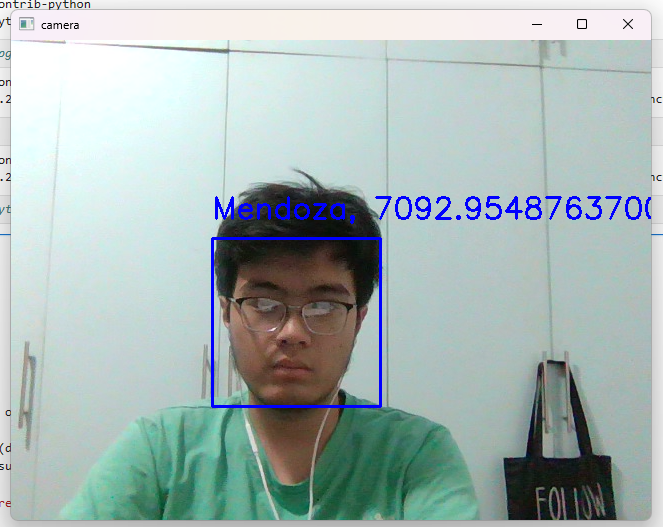

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

## 5. Summary, Conclusions and Lessons Learned

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*